<font size = "4" color = "Blue"> <b> HAND WRITTEN DIGIT RECOGNITION </b> </font>

<font size = "3" color = "Purple"> <b> PROJECT OVERVIEW </b> </font>  

This project aims to recognize handwritten digits (0-9) using a Convolutional Neural Network (CNN).
The digits are extracted from the MNIST (Modified National Institute of Standards and Technology) dataset, which contains 70,000 grayscale images (28x28 pixels) of handwritten digits.

CNNs excel in image classification tasks due to their ability to learn spatial hierarchies of features, making them ideal for recognizing patterns in handwritten digits.

<font size = "3" color = "Purple"> <b> KEY FEATURES </b> </font>  

1. `Data Loading and Preprocessing`
    - Load the MNIST dataset.
    - Normalize pixel values to improve model convergence.
    - Reshape data to fit the CNN input shape.
2. `CNN Model Architecture`
    - Input Layer: 28x28 grayscale images.
    - Convolutional Layers: Extract spatial features from images.
    - Pooling Layers: Downsample feature maps to reduce dimensionality.
    - Fully Connected Layer: Flatten feature maps and perform classification.
3. `Model Training and Validation`
    - Compile the model with appropriate loss and optimizer.
    - Fit the model on training data and evaluate on test data.
4. `Performance Evaluation`
    - Evaluate model accuracy and loss.
    - Visualize training and validation performance using graphs.
5. `Prediction and Visualization`
    - Predict labels for unseen data.
    - Display predictions with actual digits for comparison.

<font size = "3" color = "Purple"> <b> 1️⃣ Import Required Libraries</b> </font>  

- `numpy` – Handles numerical operations.
- `mnist` – Loads the MNIST dataset.
- `to_categorical` – Converts labels to one-hot encoding.
- `Conv2D`, `MaxPooling2D`, `Flatten`, `Dense` – Define CNN layers.
- `Sequential` – Builds a CNN model.
- `matplotlib` – Plots graphs and visualizes images.
- `cv2` – Preprocesses and loads external images.
- `os` – Iterates through directory images.

In [1]:
# Import necessary libraries
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import os
import cv2

# Ignore all warnings
import warnings
warnings.filterwarnings('ignore')

<font size = "3" color = "Purple"> <b> 2️⃣ Load and Preprocess MNIST Dataset </b> </font>  

- `mnist.load_data()` – Loads training and test data from the MNIST dataset.
- `X_train` and `X_test` – Images of digits.
- `y_train` and `y_test` – Corresponding labels.
- Reshapes the images to (**28, 28, 1**) to include the channel dimension for grayscale.

In [2]:
# Load the MNIST dataset from a local path
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Reshape the training and test data to have a single channel
X_train = np.reshape(X_train, (X_train.shape[0], 28, 28, 1))
X_test = np.reshape(X_test, (X_test.shape[0], 28, 28, 1))

print(X_train.shape)
print(X_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


<font size = "3" color = "Purple"> <b> 3️⃣ Normalize and One-Hot Encode Labels </b> </font> 

- Normalizes pixel values between `0` and `1` for faster convergence.
- Converts the labels to **one-hot encoded** format, required for multi-class classification.

In [3]:
# Normalize the pixel values to be between 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0

# Convert the labels to one-hot encoded vectors
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

<font size = "3" color = "Purple"> <b> 4️⃣ Define CNN Model Architecture </b> </font>  

- `Sequential()` – Initializes a CNN model.
- **Layer 1:** `Conv2D(32, (3, 3), activation='relu')`
    - 32 filters, 3x3 kernel, ReLU activation.
    - Detects basic features (edges, curves).
- **Layer 2:** `MaxPooling2D((2, 2))` – Downsamples feature maps.
- **Layer 3:** `Conv2D(64, (3, 3), activation='relu')` – Detects complex features.
- **Layer 4:** `MaxPooling2D((2, 2))` – Downsamples feature maps.
- **Layer 5:** `Conv2D(64, (3, 3), activation='relu')` – Adds more feature extraction.
- **Flatten():** Converts 2D feature maps to 1D.
- **Dense(64):** Fully connected layer with 64 neurons.
- **Dense(10):** Output layer with 10 classes (digits 0-9), using softmax activation.

In [4]:
# Define the CNN architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

<font size = "3" color = "Purple"> <b> 5️⃣ Compile and Train the Model </b> </font> 

- `loss='categorical_crossentropy'` – Suitable for multi-class classification.
- `optimizer='adam'` – Adaptive gradient optimization for better results.
- `metrics=['accuracy']` – Evaluates accuracy during training.
- `model.fit()` – Trains the model for **5 epochs** with batch size **64** and validates on test data.


In [5]:
# Compile the model with categorical cross-entropy loss and Adam optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model with the training data and validate with the test data
history = model.fit(X_train, y_train, epochs=5, batch_size=64, validation_data=(X_test, y_test))

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - accuracy: 0.8646 - loss: 0.4354 - val_accuracy: 0.9814 - val_loss: 0.0599
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9823 - loss: 0.0578 - val_accuracy: 0.9876 - val_loss: 0.0356
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 9s 10ms/step - accuracy: 0.9879 - loss: 0.0386 - val_accuracy: 0.9907 - val_loss: 0.0266
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9912 - loss: 0.0289 - val_accuracy: 0.9900 - val_loss: 0.0350
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 10s 10ms/step - accuracy: 0.9931 - loss: 0.0225 - val_accuracy: 0.9888 - val_loss: 0.0361


<font size = "3" color = "Purple"> <b> 6️⃣ Evaluate Model Performance </b> </font>  
- `model.evaluate()` – Calculates test loss and accuracy after training.
- `test_acc` – Displays model accuracy on unseen data.

In [6]:
# Evaluate the trained model on the test data
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9865 - loss: 0.0448
Test accuracy: 0.9887999892234802


<font size = "3" color = "Purple"> <b> 7️⃣ Plot Training and Validation Accuracy </b> </font>  
- Plots training and validation accuracy across epochs to visualize performance trends.

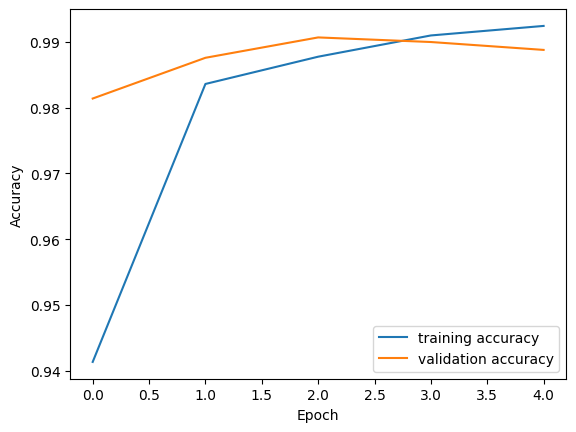

In [7]:
# Plot the training and validation accuracy over epochs
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

<font size = "3" color = "Purple"> <b> 8️⃣ Visualize Predictions on Test Data </b> </font>  
- Displays 5 test images with predicted labels.
- Shows class-wise prediction probabilities.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


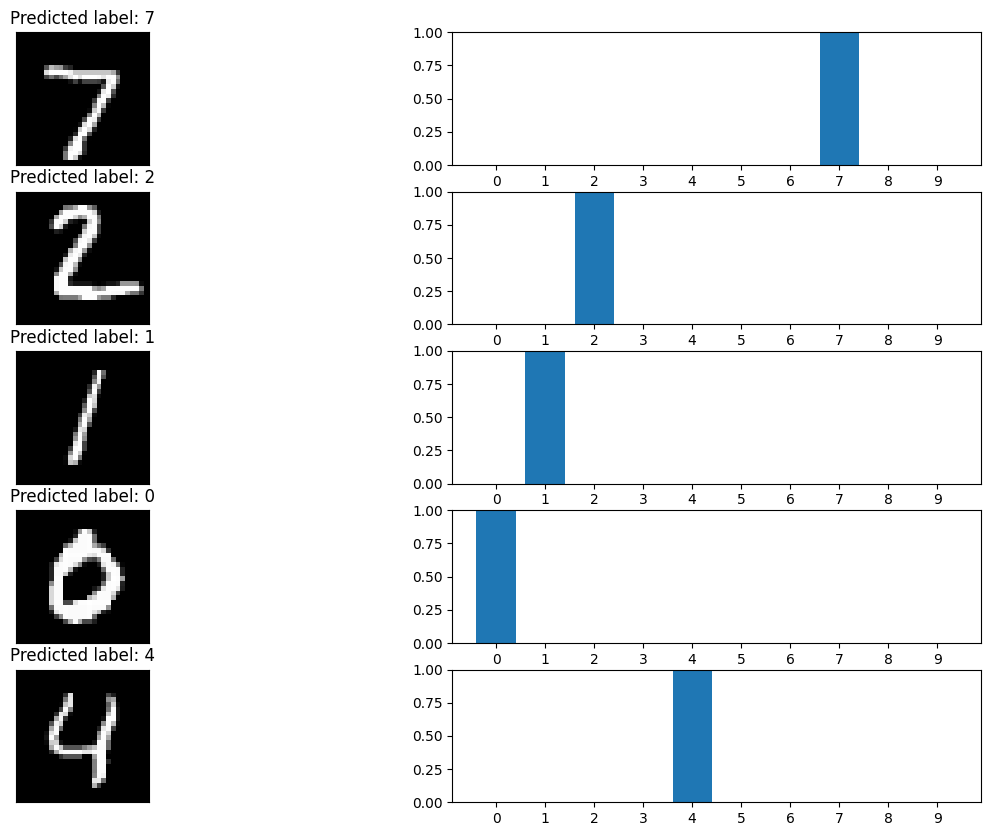

In [8]:
# Plot some example predictions
num_examples = 5
fig, axes = plt.subplots(nrows=num_examples, ncols=2, figsize=(15,10))
for i in range(num_examples):
    # Make a prediction
    prediction = model.predict(X_test[i:i+1])[0]
    predicted_label = np.argmax(prediction)
    # Plot the image and the predicted label
    axes[i, 0].imshow(X_test[i].reshape(28, 28), cmap='gray')
    axes[i, 0].set_xticks([])
    axes[i, 0].set_yticks([])
    axes[i, 0].set_title(f'Predicted label: {predicted_label}')
    # Plot the predicted probabilities for each class
    axes[i, 1].bar(x=range(10), height=prediction)
    axes[i, 1].set_xticks(range(10))
    axes[i, 1].set_ylim([0, 1])
plt.show()

<font size = "3" color = "Purple"> <b> 9️⃣ Preprocess External Images </b> </font>  
- Resizes, normalizes, and reshapes external images for prediction.

In [9]:
# Preprocessing the image
def preprocess_image(image):
    image = cv2.resize(image, (28, 28)) # Resize
    image = image / 255.0 # Normalization
    image = np.expand_dims(image, axis=-1)
    image = np.expand_dims(image, axis=0)
    return image

<font size = "3" color = "Purple"> <b> 🔟 Predict Handwritten Digits from Images </b> </font>  
- Preprocesses the image and predicts the digit using the trained CNN.

In [10]:
# Predicting the number
def predict_number(model, image):
    image = preprocess_image(image)
    prediction = model.predict(image)[0]
    predicted_number = np.argmax(prediction)
    return predicted_number

<font size = "3" color = "Purple"> <b> 1️⃣1️⃣ Batch Prediction from Directory </b> </font>  
- Iterates through images in the `digits` directory, predicts, and displays the results.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


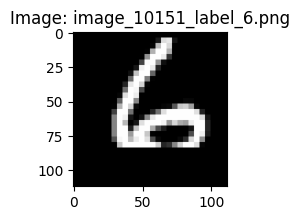

The predicted number in image_10151_label_6.png is: 6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


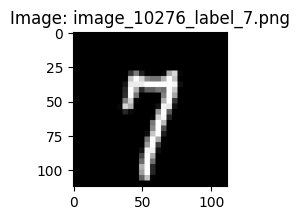

The predicted number in image_10276_label_7.png is: 7
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


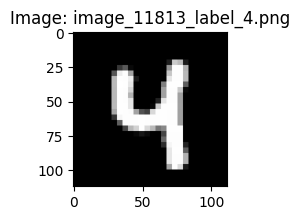

The predicted number in image_11813_label_4.png is: 4
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


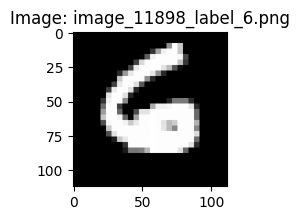

The predicted number in image_11898_label_6.png is: 6
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


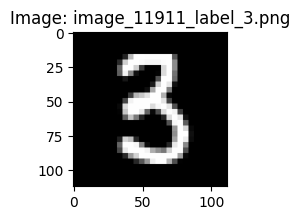

The predicted number in image_11911_label_3.png is: 3
✅ Total number of images predicted: 5


In [11]:
# Iterate through a limited number of files in our directory and send them to the model
def main(image_dir, model, max_predictions=5):  # Set max_predictions to limit predictions
    prediction_count = 0  # Counter for total predictions
    
    for filename in os.listdir(image_dir):
        if filename.endswith('.jpg') or filename.endswith('.png'):
            # Stop predicting if max_predictions is reached
            if prediction_count >= max_predictions:
                break
            
            # Load the image
            image_path = os.path.join(image_dir, filename)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            
            # Predict the number in the image
            predicted_number = predict_number(model, image)
            
            # Display the original image
            plt.figure(figsize=(2, 2))
            plt.imshow(image, cmap='gray')
            plt.title(f'Image: {filename}')
            plt.show()
            
            # Print the predicted number
            print(f'The predicted number in {filename} is: {predicted_number}')
            
            # Increment the prediction count
            prediction_count += 1

    # Print the total number of predictions
    print(f"✅ Total number of images predicted: {prediction_count}")


# Run the main function with a limit on predictions
if __name__ == '__main__':
    image_dir = r"digits"  # Directory containing images
    max_predictions = 5    # Define how many images to predict
    main(image_dir, model, max_predictions)

<font size = "3" color = "Purple"> <b> 1️⃣2️⃣ Predict Single Image </b> </font>  
- Loads a single image (`5.png`), predicts the digit, and displays the result.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


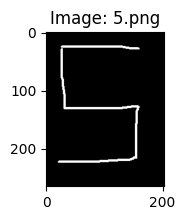

The predicted number in 5.png is: 5


In [12]:
# Load and preprocess the image
image_path = r"5.png"
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Predict the number
predicted_number = predict_number(model, image)

# Display the image and prediction
plt.figure(figsize=(2, 2))
plt.imshow(image, cmap='gray')
plt.title(f'Image: {image_path}')
plt.show()

print(f'The predicted number in {image_path} is: {predicted_number}')

<font size = "3" color = "Purple"> <b> 💾 Save the Trained Model </b> </font>  
- `model.save('digit_recognition_model.h5')` – Saves the trained model in HDF5 format.
- This file can be loaded later for predictions without retraining.

In [13]:
# Save the trained model
model.save('digit_recognition_model.h5')
print("✅ Model saved successfully as 'digit_recognition_model.h5'")

✅ Model saved successfully as 'digit_recognition_model.h5'


<font size = "3" color = "Purple"> <b> Load the Trained Model and Make Predictions</b> </font>  

In [1]:
import cv2
import numpy as np

# Preprocess uploaded image correctly
def preprocess_image(image):
    # Resize to 28x28
    image = cv2.resize(image, (28, 28))
    
    # Convert to grayscale if not already
    if len(image.shape) == 3:
        image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Normalize the image (same as MNIST)
    image = image / 255.0
    
    # Reshape to match model input shape
    image = np.reshape(image, (1, 28, 28, 1))  # Add batch and channel dimensions
    
    return image

In [3]:
from tensorflow.keras.models import load_model
import cv2
import numpy as np

# Load the saved model
model = load_model('digit_recognition_model.h5')
print("✅ Model loaded successfully!")

# Load an image (update path to your image)
image_path = '5.png'  # Add your image path
image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Preprocess the image
processed_image = preprocess_image(image)

# Make prediction
prediction = model.predict(processed_image)
predicted_class = np.argmax(prediction)

print(f"✅ Predicted Digit: {predicted_class}")

✅ Model loaded successfully!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 113ms/step
✅ Predicted Digit: 5
